In [9]:

import geopandas as gpd

# Carregar o o arquivo gpkg
caminho_arquivo = "C:/Users/guilh/OneDrive/Documentos/TopoGeo_Arq_Uteis/solos_mg_sisema/ide_1502_mg_mapa_solos_pol/solos_mg.gpkg"

# Carregando o arquivo GeoPackage
gdf = gpd.read_file(caminho_arquivo)

# Imprimindo as primeiras linhas do GeoDataFrame
print(gdf.head())

C:\Users\guilh\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'solos_mg.gpkg': 'ide_1502_mg_mapa_solos_pol' (default), 'reprojetadoa', 'solos_mg__ide_1502_mg_mapa_solos_pol'. Specify layer parameter to avoid this warning.
  result = read_func(


   objectid_1 um_sequenc  shape_leng  shape_area  \
0           5     CXbd11    0.189131    0.001049   
1          10     CXbd13    0.181950    0.001336   
2          11     CXbd13    0.196156    0.001355   
3          12     CXbd13   14.124038    0.145806   
4          16     CXbd13    0.153414    0.000864   

                            legenda  \
0  Cambissolo h�plico Tb distr�fico   
1  Cambissolo h�plico Tb distr�fico   
2  Cambissolo h�plico Tb distr�fico   
3  Cambissolo h�plico Tb distr�fico   
4  Cambissolo h�plico Tb distr�fico   

                                            geometry  
0  MULTIPOLYGON (((-48.56558 -18.39054, -48.56251...  
1  MULTIPOLYGON (((-45.5132 -17.70468, -45.51574 ...  
2  MULTIPOLYGON (((-45.47021 -17.54549, -45.46794...  
3  MULTIPOLYGON (((-45.72133 -17.94786, -45.72773...  
4  MULTIPOLYGON (((-47.08433 -17.3137, -47.08135 ...  


C:\Users\guilh\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'solos_mg.gpkg': 'ide_1502_mg_mapa_solos_pol' (default), 'reprojetadoa', 'solos_mg__ide_1502_mg_mapa_solos_pol'. Specify layer parameter to avoid this warning.
  result = read_func(


Sistema de coordenadas atual: EPSG:4674


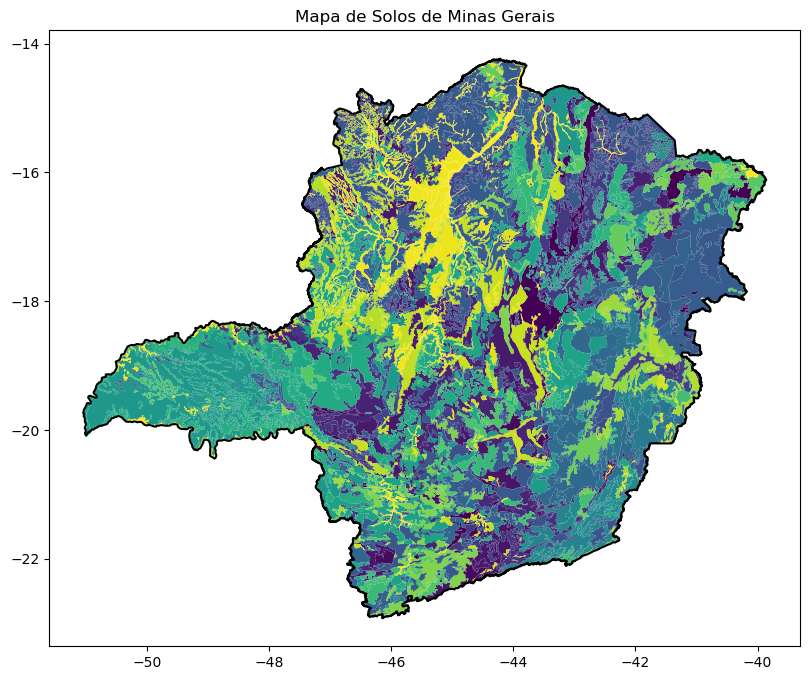

In [11]:
import matplotlib.pyplot as plt

# Carregando o arquivo GeoPackage
mapa_solos = gpd.read_file(caminho_arquivo)

# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {mapa_solos.crs}")

# Se o sistema de coordenadas não for SIRGAS 2000 (EPSG:4674), converta
if mapa_solos.crs != 'EPSG:4674':
    mapa_solos = mapa_solos.to_crs(epsg=4674)

# Carregar o limite do estado de MG
caminho_arquivo2 = "C:/Users/guilh/OneDrive/Documentos/TopoGeo_Arq_Uteis/limites_geograficos/MG_limites_UTM_2000.gpkg"
mg_limite = gpd.read_file(caminho_arquivo2)

# Plotando o mapa com cores distintas para cada classe de solo
fig, ax = plt.subplots(figsize=(12, 8))
mapa_solos.plot(column='um_sequenc', cmap='viridis', legend=False, ax=ax)

# Sobrepor a delimitação do estado de MG
mg_limite.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)

# Adicionando título ao mapa
plt.title('Mapa de Solos de Minas Gerais')

# Exibindo o mapa
plt.show()

In [12]:
import pandas as pd

# Criando um novo DataFrame com as colunas 'legenda' e 'um_sequenc'
df_legenda_sequencia = gdf[['legenda', 'um_sequenc']].drop_duplicates()

# Exibindo a tabela com os valores únicos das colunas 'legenda' e 'um_sequenc'
df_legenda_sequencia

,legenda,um_sequenc
0,Cambissolo h�plico Tb distr�fico,CXbd11
1,Cambissolo h�plico Tb distr�fico,CXbd13
22,Cambissolo h�plico Tb distr�fico,CXbd18
23,Cambissolo h�plico Tb distr�fico,CXbd19
25,Cambissolo h�plico Tb distr�fico,CXbd2
...,...,...
3356,Latossolo amarelo distr�fico,LAd7
3358,Argissolo vermelho distr�fico,PVd6
3359,Latossolo vermelho-amarelo distr�fico,LVAd79
3361,Latossolo vermelho-amarelo distr�fico,LVAd55


In [14]:
# Definir a lista de classes de solo de interesse
solos_adequados = [
    'LVAd1', 'LVd1', 'LVdf1', 'LVef1', 'LVAdf1', 'LVAe1', 'LVe1',
    'PVAd7', 'PVAe13', 'PVd1', 'PVe2', 'NVe2', 'NXe1', 'NVef1',
    'CXbe5', 'CXbd11', 'CXbdf1'
]

# Filtrar o GeoDataFrame para manter apenas as classes desejadas
solos_filtrados = mapa_solos[mapa_solos['um_sequenc'].isin(solos_adequados)]

# Caminho para salvar o novo arquivo
novo_caminho = 'solos_adequados.gpkg'

# Salvar o novo GeoDataFrame em um arquivo GeoPackage
solos_filtrados.to_file(novo_caminho, driver='GPKG')

Sistema de coordenadas atual: EPSG:4674


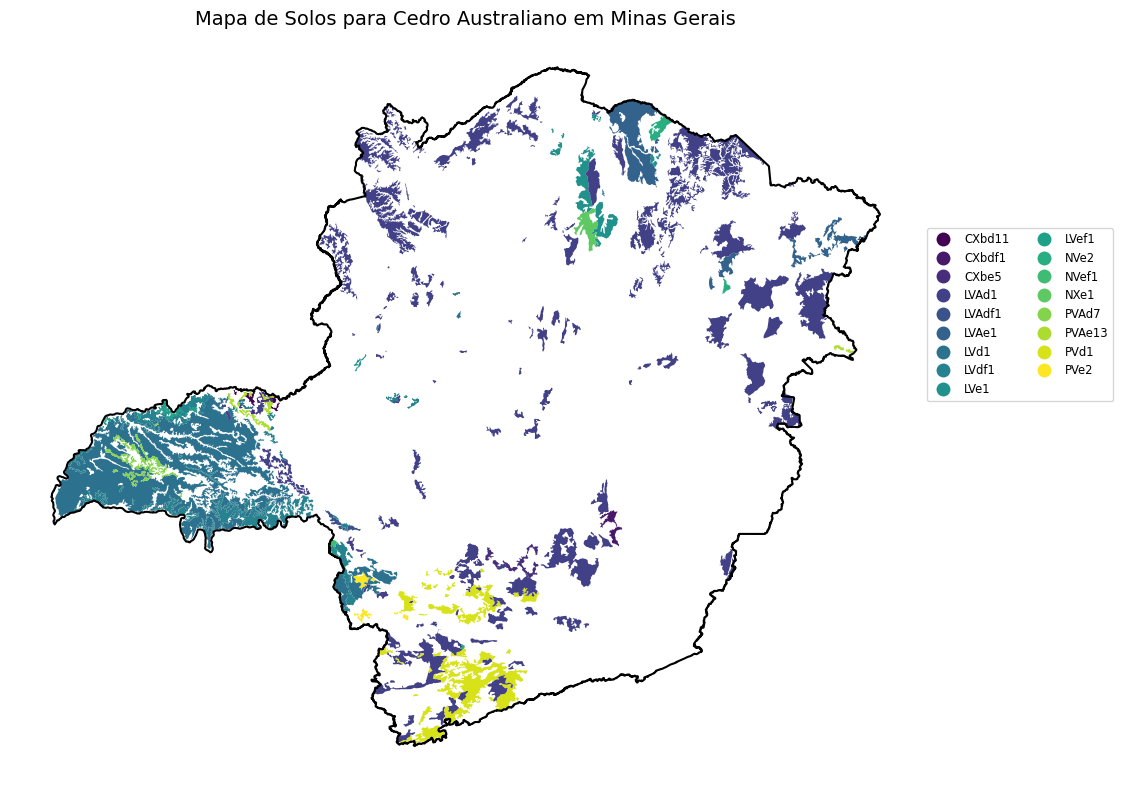

In [15]:
# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {mg_limite.crs}")

# Se o sistema de coordenadas não for SIRGAS 2000 (EPSG:4674), converta
if mg_limite.crs != 'EPSG:4674':
    mg_limite = mg_limite.to_crs(epsg=4674)

# Plotando o mapa
fig, ax = plt.subplots(figsize=(12, 8))

# Definição do número de colunas para evitar que a legenda fique muito longa
num_colunas_legenda = 2

# Plotando os solos filtrados com legenda ajustada
solos_filtrados.plot(column='um_sequenc', cmap='viridis', legend=True, ax=ax,
                     legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0.5),
                                  'ncol': num_colunas_legenda, 'fontsize': 'small'})

# Sobrepor a delimitação do estado de MG
mg_limite.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)

# Adicionando título ao mapa
ax.set_title('Mapa de Solos para Cedro Australiano em Minas Gerais', fontsize=14)

# Removendo eixos para um visual mais limpo
ax.set_axis_off()

# Ajustando layout para melhor visualização
plt.tight_layout()

# Exibindo o mapa
plt.show()

In [19]:
# Carregar o arquivo GeoPackage
area_solos_adequados = gpd.read_file('solos_adequados.gpkg')

# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {area_solos_adequados.crs}")

# Se o sistema de coordenadas for geográfico (EPSG:4674), converta para UTM (EPSG:31983)
if area_solos_adequados.crs.is_geographic:
    area_solos_adequados = area_solos_adequados.to_crs(epsg=31983)

# Calculando a área de cada polígono em metros quadrados
area_solos_adequados['area_m2'] = area_solos_adequados.geometry.area

# Convertendo de metros quadrados para hectares (1 hectare = 10.000 metros quadrados)
area_solos_adequados['area_ha'] = area_solos_adequados['area_m2'] / 10000

# Agrupando por classe e somando a área em hectares
area_por_classe = area_solos_adequados.groupby('um_sequenc')['area_ha'].sum()

# Arredondando os valores para 2 casas decimais
area_por_classe = area_por_classe.round(2)

# Exibindo a área por classe
print(area_por_classe)


Sistema de coordenadas atual: EPSG:4674
um_sequenc
CXbd11      35749.68
CXbdf1      43652.89
CXbe5       97006.66
LVAd1     4571556.18
LVAdf1      26382.92
LVAe1      598297.93
LVd1      2853379.31
LVdf1      764052.45
LVe1       263298.43
LVef1       86023.47
NVe2        68818.59
NVef1        8383.05
NXe1        89724.29
PVAd7      130244.73
PVAe13     104867.60
PVd1       821829.04
PVe2        49470.58
Name: area_ha, dtype: float64


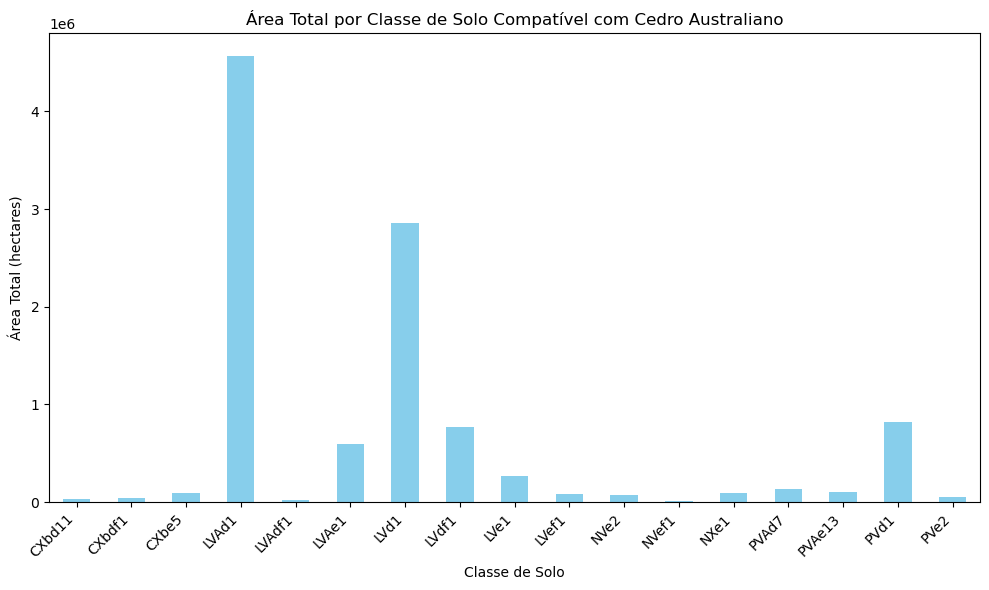

Estatísticas descritivas da área por classe:
count    1.700000e+01
mean     6.242787e+05
std      1.228974e+06
min      8.383050e+03
25%      4.947058e+04
50%      9.700666e+04
75%      5.982979e+05
max      4.571556e+06
Name: area_ha, dtype: float64

A classe com a maior área é: LVAd1 com 4571556.18 hectares.

A classe com a menor área é: NVef1 com 8383.05 hectares.

A área total de solos adequados para o Cedro Australiano é: 10612737.799999999 hectares.


In [20]:
# Análise gráfica
plt.figure(figsize=(10, 6))
area_por_classe.plot(kind='bar', color='skyblue')
plt.title('Área Total por Classe de Solo Compatível com Cedro Australiano')
plt.xlabel('Classe de Solo')
plt.ylabel('Área Total (hectares)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os labels do eixo x para melhor visualização
plt.tight_layout()
plt.show()


# Análise estatística
print("Estatísticas descritivas da área por classe:")
print(area_por_classe.describe())

# Encontrando a classe com a maior área
classe_maior_area = area_por_classe.idxmax()
area_maior_classe = area_por_classe.max()
print(f"\nA classe com a maior área é: {classe_maior_area} com {area_maior_classe} hectares.")

# Encontrando a classe com a menor área
classe_menor_area = area_por_classe.idxmin()
area_menor_classe = area_por_classe.min()
print(f"\nA classe com a menor área é: {classe_menor_area} com {area_menor_classe} hectares.")

# Calculando a área total
area_total = area_por_classe.sum()
print(f"\nA área total de solos adequados para o Cedro Australiano é: {area_total} hectares.")